In [1]:
import pandas as pd
from pandas import DataFrame
from pandas import read_excel, pivot_table
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [2]:
# 주성분 분석용 패키지
from sklearn.decomposition import PCA
# 주성분 분석 결과를 DataFrame으로 확인할 수 있는 기능을 제공하는 패키지
from pca import pca 
# 표준화 처리 패키지
from sklearn.preprocessing import StandardScaler

from pandas import read_excel, DataFrame

from matplotlib import pyplot as plt
import seaborn as sb

import sys
import os
from sklearn.decomposition import PCA
# 주성분 분석 결과를 DataFrame으로 확인할 수 있는 기능을 제공하는 패키지
from pca import pca 
# 표준화 처리 패키지

In [3]:
df = pd.read_excel("빚추가마지막.xlsx")
df

,Unnamed: 0,gen,age,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,...,preg_experience,health_state,disabled,work_state,work_code,region,income,y_total,debt,y_train
0,0,female,78,yes,중졸,NaN,no,NaN,전혀마시지않음,NaN,...,없다,2,abled,nowork,NaN,city,NaN,20,10350.0,0
1,1,male,75,no,초졸이하,NaN,no,NaN,전혀마시지않음,NaN,...,남성,1,abled,work,942.0,city,172.0,29,0.0,1
2,2,male,81,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,...,남성,4,abled,work,762.0,city,100.0,18,21220.0,0
3,3,male,61,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,...,남성,4,abled,work,855.0,city,268.0,20,0.0,0
4,4,female,60,yes,고졸,NaN,no,NaN,전혀마시지않음,NaN,...,없다,4,abled,work,399.0,city,140.0,21,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13469,13469,male,47,no,대졸이상,25.0,yes,10.0,주2~3회,주1회,...,남성,4,abled,work,151.0,city,NaN,17,26014.0,0
13470,13470,female,46,no,대졸이상,NaN,no,NaN,주2~3회,연1회,...,없다,4,abled,nowork,NaN,city,NaN,17,26014.0,0
13471,13471,male,48,no,대졸이상,25.0,yes,7.0,전혀마시지않음,NaN,...,남성,4,abled,work,222.0,city,833.0,17,12360.0,0
13472,13472,male,59,yes,대졸이상,32.0,no,NaN,전혀마시지않음,NaN,...,남성,4,abled,work,248.0,city,NaN,18,1902.0,0


In [4]:
lista = list(df.columns)
lista

['Unnamed: 0',
 'gen',
 'age',
 'religion',
 'edu',
 'sm_year',
 'sm_state',
 'sm_day',
 'dr_mean_year',
 'dr_6cup',
 'dr_hurt',
 'dr_worry',
 'preg_experience',
 'health_state',
 'disabled',
 'work_state',
 'work_code',
 'region',
 'income',
 'y_total',
 'debt',
 'y_train']

In [5]:
new_df = df[['income','debt','y_total','y_train']]
new_df

,income,debt,y_total,y_train
0,NaN,10350.0,20,0
1,172.0,0.0,29,1
2,100.0,21220.0,18,0
3,268.0,0.0,20,0
4,140.0,0.0,21,0
...,...,...,...,...
13469,NaN,26014.0,17,0
13470,NaN,26014.0,17,0
13471,833.0,12360.0,17,0
13472,NaN,1902.0,18,0


In [6]:
income_df = new_df['income'].fillna(0)
# income_df
income_df = pd.DataFrame(income_df)
income_df.columns = ['income_zero']

In [7]:
concat = pd.concat([new_df, income_df], axis=1).drop('income', axis=1)
concat

,debt,y_total,y_train,income_zero
0,10350.0,20,0,0.0
1,0.0,29,1,172.0
2,21220.0,18,0,100.0
3,0.0,20,0,268.0
4,0.0,21,0,140.0
...,...,...,...,...
13469,26014.0,17,0,0.0
13470,26014.0,17,0,0.0
13471,12360.0,17,0,833.0
13472,1902.0,18,0,0.0


In [8]:
concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13474 entries, 0 to 13473
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   debt         13474 non-null  float64
 1   y_total      13474 non-null  int64  
 2   y_train      13474 non-null  int64  
 3   income_zero  13474 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 421.2 KB


In [9]:
concat.describe()

,debt,y_total,y_train,income_zero
count,13474.000000,13474.000000,13474.00000,13474.000000
mean,4101.976406,19.061526,0.13463,109.374722
std,9972.607241,3.222149,0.34134,190.655272
min,0.000000,11.000000,0.00000,0.000000
25%,0.000000,17.000000,0.00000,0.000000
50%,0.000000,18.000000,0.00000,0.000000
75%,4048.750000,20.000000,0.00000,197.000000
max,256400.000000,42.000000,1.00000,2017.000000


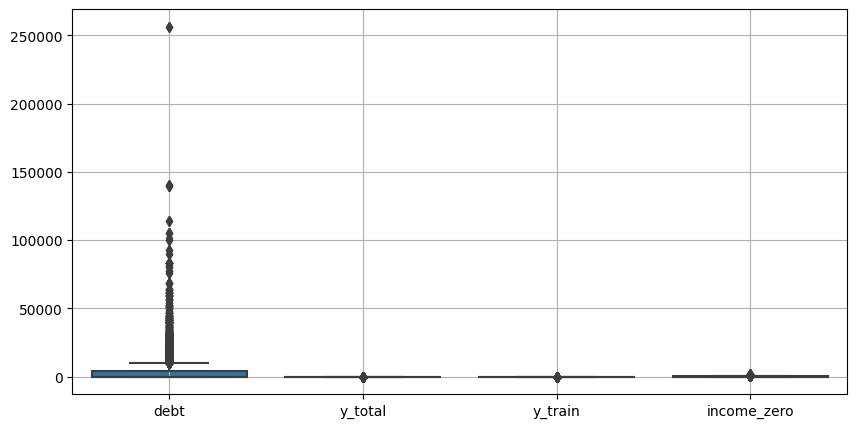

In [10]:
plt.figure(figsize=(10, 5))
sb.boxplot(data=concat)
plt.grid()
plt.show()
plt.close()

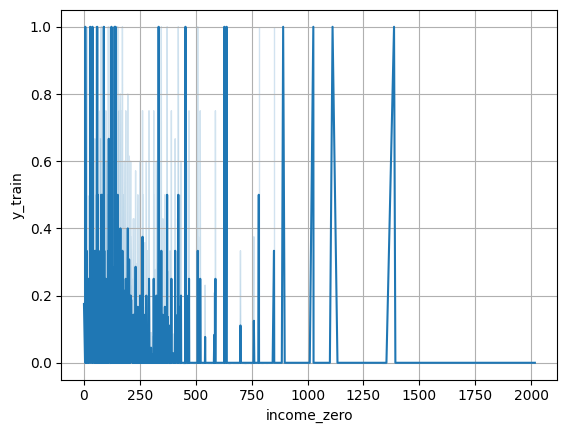

In [11]:
plt.figure()
sb.lineplot(data=concat, x='income_zero', y='y_train')
plt.grid()
plt.show()
plt.close()

In [12]:
condition = (
    (concat.income_zero > 27) #&
    # (concat.debt > 10)
    )
dummy_df = concat.loc[condition]
dummy_df

,debt,y_total,y_train,income_zero
1,0.0,29,1,172.0
2,21220.0,18,0,100.0
3,0.0,20,0,268.0
4,0.0,21,0,140.0
13,12921.0,20,0,267.0
...,...,...,...,...
13465,3096.0,17,0,297.0
13466,3096.0,17,0,217.0
13467,41560.0,17,0,420.0
13468,41560.0,17,0,405.0


In [13]:
# plt.figure()
# sb.lineplot(data=dummy_df, x='income_zero', y='y_train')
# plt.grid()
# plt.show()
# plt.close()

In [14]:
# dummy_df

In [15]:
# dummy_df.duplicated().sum()

In [16]:
# dummy_df.drop_duplicates()

In [17]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# scaler.fit(dummy_df)
# scaled = scaler.transform(dummy_df)
# scaled = pd.DataFrame(scaled)
# scaled.columns = ['debt', 'y_total', 'y_train', 'income_zero']
# scaled

In [18]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# scaler.fit(dummy_df)
# scaled = scaler.transform(dummy_df)
# scaled = pd.DataFrame(scaled)
# scaled.columns = ['debt', 'y_total', 'y_train', 'income_zero']
# scaled 

In [19]:
dummy_df['income_zero'] = np.log1p(dummy_df['income_zero'])
dummy_df['debt'] = np.log1p(dummy_df['debt'])
dummy_df

C:\Users\user\AppData\Local\Temp\ipykernel_6136\1452600294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dummy_df['income_zero'] = np.log1p(dummy_df['income_zero'])
C:\Users\user\AppData\Local\Temp\ipykernel_6136\1452600294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dummy_df['debt'] = np.log1p(dummy_df['debt'])


,debt,y_total,y_train,income_zero
1,0.000000,29,1,5.153292
2,9.962747,18,0,4.615121
3,0.000000,20,0,5.594711
4,0.000000,21,0,4.948760
13,9.466687,20,0,5.590987
...,...,...,...,...
13465,8.038189,17,0,5.697093
13466,8.038189,17,0,5.384495
13467,10.634918,17,0,6.042633
13468,10.634918,17,0,6.006353


In [20]:
# sb.lineplot(data=scaled, x='debt', y='y_train')

In [21]:
# sb.lineplot(data=scaled, x='income_zero', y='y_train')

In [22]:
# sample = scaled.sample(300, random_state=20)
# sample

In [23]:
# s, p = stats.shapiro(sample['income_zero'])
# print("Shapiro-Wilk Test: (통계량, p-value) = ", (s, p))

# "정규성을 따름" if p > 0.05 else "정규성을 따르지 않음"

In [24]:
s, p = stats.kstest(dummy_df['income_zero'], 'norm')
print("Kolmogorov Smirnov Test: (통계량, p-value) = ", (s, p))

if p > 0.05:
    print("정규 분포를 따릅니다. (귀무가설 채택)")
else:
    print("정규 분포를 따르지 않습니다. (귀무가설 기각)")

Kolmogorov Smirnov Test: (통계량, p-value) =  (0.9996204539434627, 0.0)
정규 분포를 따르지 않습니다. (귀무가설 기각)


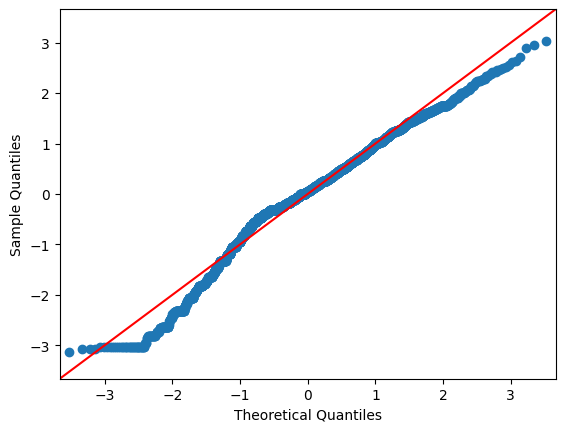

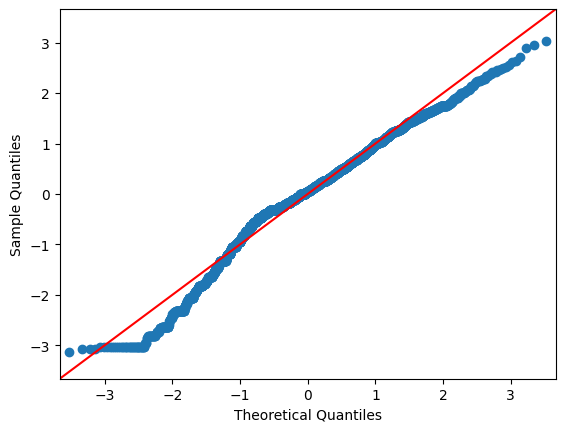

In [25]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

sm.qqplot(dummy_df['income_zero'], fit=True, line='45')

대부분의 데이터들이 일직선상에 위치하므로 정규성을 따른다고 말할 수 있다.

In [26]:
dummy_df['income_zero']

1        5.153292
2        4.615121
3        5.594711
4        4.948760
13       5.590987
           ...   
13465    5.697093
13466    5.384495
13467    6.042633
13468    6.006353
13471    6.726233
Name: income_zero, Length: 4706, dtype: float64

#### --------------------
#### --------------------
#### --------------------
#### --------------------
#### --------------------
#### --------------------
#### --------------------

In [27]:
dummy_df

,debt,y_total,y_train,income_zero
1,0.000000,29,1,5.153292
2,9.962747,18,0,4.615121
3,0.000000,20,0,5.594711
4,0.000000,21,0,4.948760
13,9.466687,20,0,5.590987
...,...,...,...,...
13465,8.038189,17,0,5.697093
13466,8.038189,17,0,5.384495
13467,10.634918,17,0,6.042633
13468,10.634918,17,0,6.006353


In [28]:
# 소득이 100이상인 사람들만 뽑기
condition = (
    (concat.income_zero > 1) 
    # (concat.debt > 10)
    )
dummy_df = concat.loc[condition]
dummy_df

,debt,y_total,y_train,income_zero
1,0.0,29,1,172.0
2,21220.0,18,0,100.0
3,0.0,20,0,268.0
4,0.0,21,0,140.0
7,0.0,20,0,27.0
...,...,...,...,...
13465,3096.0,17,0,297.0
13466,3096.0,17,0,217.0
13467,41560.0,17,0,420.0
13468,41560.0,17,0,405.0


In [29]:
dummy_df.isnull().sum()

debt           0
y_total        0
y_train        0
income_zero    0
dtype: int64

In [30]:
dummy_df.describe()

,debt,y_total,y_train,income_zero
count,5375.000000,5375.000000,5375.000000,5375.000000
mean,5376.329898,18.330419,0.073860,274.179535
std,10131.800900,2.603895,0.261568,214.327077
min,0.000000,11.000000,0.000000,5.000000
25%,0.000000,17.000000,0.000000,120.000000
50%,225.000000,17.000000,0.000000,234.000000
75%,7234.000000,19.000000,0.000000,361.000000
max,139900.000000,35.000000,1.000000,2017.000000


In [31]:
# 소득이 100이상인 사람들만 뽑기
condition = (
    (concat.income_zero < 240) &
    (concat.income_zero > 110) 
    # (concat.debt > 10660)
    )
dummy_df2 = concat.loc[condition]
dummy_df2

,debt,y_total,y_train,income_zero
1,0.0,29,1,172.0
4,0.0,21,0,140.0
14,12921.0,23,1,217.0
19,12648.0,22,0,117.0
20,0.0,19,0,150.0
...,...,...,...,...
13429,23032.0,35,1,170.0
13447,6168.0,23,1,145.0
13452,16980.0,23,1,120.0
13462,10040.0,17,0,230.0


In [32]:
condition = (
    (concat.income_zero > 270) #& 
    # (concat.income_zero < 500) 
    # (concat.debt < 10660))
)
dummy_df3 = concat.loc[condition]
dummy_df3

,debt,y_total,y_train,income_zero
22,0.0,15,0,310.0
26,3100.0,17,0,350.0
30,0.0,17,0,655.0
31,2721.0,17,0,272.0
33,0.0,17,0,387.0
...,...,...,...,...
13464,0.0,17,0,667.0
13465,3096.0,17,0,297.0
13467,41560.0,17,0,420.0
13468,41560.0,17,0,405.0


In [33]:
# # 다운샘플링
# from sklearn.utils import resample

# downsampled = resample(dummy_df2,
#                                 replace=False,
#                                 n_samples=750,
#                                 random_state=42)

# data = pd.concat([dummy_df3, downsampled])
# data

In [34]:
data = pd.concat([dummy_df3, dummy_df2])
data

,debt,y_total,y_train,income_zero
22,0.0,15,0,310.0
26,3100.0,17,0,350.0
30,0.0,17,0,655.0
31,2721.0,17,0,272.0
33,0.0,17,0,387.0
...,...,...,...,...
13429,23032.0,35,1,170.0
13447,6168.0,23,1,145.0
13452,16980.0,23,1,120.0
13462,10040.0,17,0,230.0


In [35]:
data['income_zero'] = np.log1p(data['income_zero'])
# data['debt'] = np.log1p(data['debt'])
data

,debt,y_total,y_train,income_zero
22,0.0,15,0,5.739793
26,3100.0,17,0,5.860786
30,0.0,17,0,6.486161
31,2721.0,17,0,5.609472
33,0.0,17,0,5.961005
...,...,...,...,...
13429,23032.0,35,1,5.141664
13447,6168.0,23,1,4.983607
13452,16980.0,23,1,4.795791
13462,10040.0,17,0,5.442418


In [36]:
# sb.lineplot(data=data, x='income_zero', y='y_train')

In [37]:
sample = data.sample(500, random_state=7)
sample

,debt,y_total,y_train,income_zero
1793,3602.0,17,0,6.304449
2424,9788.0,17,0,5.655992
12866,0.0,17,0,5.993961
3578,0.0,17,0,5.613128
9829,8072.0,18,0,6.111467
...,...,...,...,...
5569,13426.0,17,0,5.407172
10374,0.0,20,0,5.303305
7346,389.0,17,0,5.257495
8970,0.0,17,0,5.303305


In [38]:
s, p = stats.shapiro(sample['income_zero'])
print("Shapiro-Wilk Test: (통계량, p-value) = ", (s, p))

"정규성을 따름" if p > 0.05 else "정규성을 따르지 않음"

Shapiro-Wilk Test: (통계량, p-value) =  (0.9821348786354065, 8.126566171995364e-06)


'정규성을 따르지 않음'

<Axes: xlabel='income_zero', ylabel='y_train'>

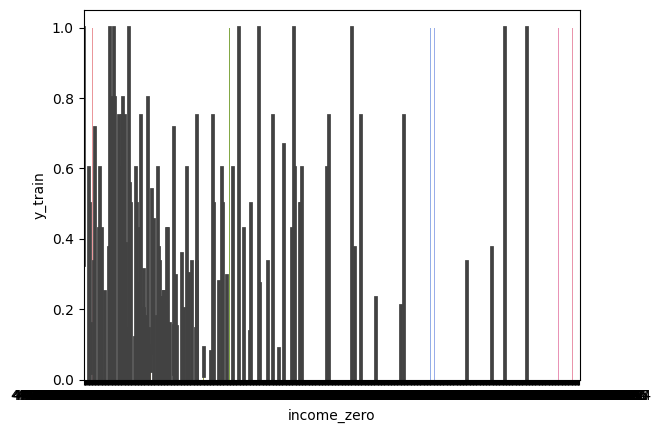

In [39]:
sb.barplot(data=data, x='income_zero', y='y_train')

In [40]:
dummy_df

,debt,y_total,y_train,income_zero
1,0.0,29,1,172.0
2,21220.0,18,0,100.0
3,0.0,20,0,268.0
4,0.0,21,0,140.0
7,0.0,20,0,27.0
...,...,...,...,...
13465,3096.0,17,0,297.0
13466,3096.0,17,0,217.0
13467,41560.0,17,0,420.0
13468,41560.0,17,0,405.0


In [41]:
# 소득이 100이상인 사람들만 뽑기
condition = (
    (dummy_df.income_zero < 250) &
    (dummy_df.income_zero > 99) 
    # (concat.debt > 10660)
    )
dummy_df2 = dummy_df.loc[condition]
dummy_df2

,debt,y_total,y_train,income_zero
1,0.0,29,1,172.0
2,21220.0,18,0,100.0
4,0.0,21,0,140.0
14,12921.0,23,1,217.0
16,0.0,22,0,100.0
...,...,...,...,...
13429,23032.0,35,1,170.0
13447,6168.0,23,1,145.0
13452,16980.0,23,1,120.0
13462,10040.0,17,0,230.0


In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(dummy_df2)
scaled = scaler.transform(dummy_df2)
scaled = pd.DataFrame(scaled)
scaled.columns = ['debt', 'y_total', 'y_train', 'income_zero']
scaled 

,debt,y_total,y_train,income_zero
0,-0.486890,4.013611,3.450955,-0.277813
1,1.761990,-0.159868,-0.289775,-2.020540
2,-0.486890,0.978354,-0.289775,-1.052358
3,0.882468,1.737168,3.450955,0.811392
4,-0.486890,1.357761,-0.289775,-2.020540
...,...,...,...,...
1699,1.954024,6.290054,3.450955,-0.326222
1700,0.166790,1.737168,3.450955,-0.931335
1701,1.312638,1.737168,3.450955,-1.536449
1702,0.577141,-0.539275,-0.289775,1.126051


In [43]:
s, p = stats.shapiro(scaled['income_zero'])
print("Shapiro-Wilk Test: (통계량, p-value) = ", (s, p))

"정규성을 따름" if p > 0.05 else "정규성을 따르지 않음"

Shapiro-Wilk Test: (통계량, p-value) =  (0.937339723110199, 3.2864197993516055e-26)


'정규성을 따르지 않음'

#### --------------------------------------------
#### --------------------------------------------
#### --------------------------------------------
#### --------------------------------------------
#### --------------------------------------------
#### --------------------------------------------
#### --------------------------------------------
#### --------------------------------------------


In [44]:
new_df = df[['income','debt','y_total','y_train']]
new_df

,income,debt,y_total,y_train
0,NaN,10350.0,20,0
1,172.0,0.0,29,1
2,100.0,21220.0,18,0
3,268.0,0.0,20,0
4,140.0,0.0,21,0
...,...,...,...,...
13469,NaN,26014.0,17,0
13470,NaN,26014.0,17,0
13471,833.0,12360.0,17,0
13472,NaN,1902.0,18,0


In [45]:
income_df = new_df['income'].fillna(0)
# income_df
income_df = pd.DataFrame(income_df)
income_df.columns = ['income_zero']

In [46]:
concat = pd.concat([new_df, income_df], axis=1).drop('income', axis=1)
concat

,debt,y_total,y_train,income_zero
0,10350.0,20,0,0.0
1,0.0,29,1,172.0
2,21220.0,18,0,100.0
3,0.0,20,0,268.0
4,0.0,21,0,140.0
...,...,...,...,...
13469,26014.0,17,0,0.0
13470,26014.0,17,0,0.0
13471,12360.0,17,0,833.0
13472,1902.0,18,0,0.0


In [47]:
# 소득이 100이상인 사람들만 뽑기
condition = (
    (concat.income_zero > 225) &
    (concat.income_zero < 325)
    )
dummy_df = concat.loc[condition]
dummy_df

,debt,y_total,y_train,income_zero
3,0.0,20,0,268.0
13,12921.0,20,0,267.0
22,0.0,15,0,310.0
31,2721.0,17,0,272.0
36,1564.0,25,1,260.0
...,...,...,...,...
13397,7180.0,21,0,271.0
13398,0.0,17,0,237.0
13448,6168.0,23,1,250.0
13462,10040.0,17,0,230.0


<Axes: xlabel='income_zero', ylabel='y_train'>

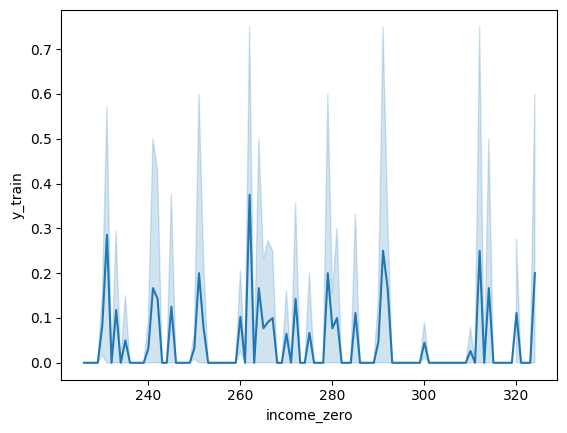

In [48]:
sb.lineplot(data=dummy_df, x='income_zero', y='y_train')

In [49]:
dummy_df['income_zero'] = np.log1p(dummy_df['income_zero'])
# data['debt'] = np.log1p(data['debt'])
dummy_df

C:\Users\user\AppData\Local\Temp\ipykernel_6136\3559035527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dummy_df['income_zero'] = np.log1p(dummy_df['income_zero'])


,debt,y_total,y_train,income_zero
3,0.0,20,0,5.594711
13,12921.0,20,0,5.590987
22,0.0,15,0,5.739793
31,2721.0,17,0,5.609472
36,1564.0,25,1,5.564520
...,...,...,...,...
13397,7180.0,21,0,5.605802
13398,0.0,17,0,5.472271
13448,6168.0,23,1,5.525453
13462,10040.0,17,0,5.442418


In [50]:
# sample = data.sample(800, random_state=7)
# sample

In [51]:
s, p = stats.shapiro(dummy_df['income_zero'])
print("Shapiro-Wilk Test: (통계량, p-value) = ", (s, p))

"정규성을 따름" if p > 0.05 else "정규성을 따르지 않음"

Shapiro-Wilk Test: (통계량, p-value) =  (0.9500805139541626, 1.6587841856907705e-19)


'정규성을 따르지 않음'

In [52]:
# 소득이 100이상인 사람들만 뽑기
condition = (
    (concat.income_zero > 150)
    # (concat.income_zero < 325)
    )
dummy_df = concat.loc[condition]
dummy_df

,debt,y_total,y_train,income_zero
1,0.0,29,1,172.0
3,0.0,20,0,268.0
13,12921.0,20,0,267.0
14,12921.0,23,1,217.0
22,0.0,15,0,310.0
...,...,...,...,...
13465,3096.0,17,0,297.0
13466,3096.0,17,0,217.0
13467,41560.0,17,0,420.0
13468,41560.0,17,0,405.0


In [53]:
dummy_df

,debt,y_total,y_train,income_zero
1,0.0,29,1,172.0
3,0.0,20,0,268.0
13,12921.0,20,0,267.0
14,12921.0,23,1,217.0
22,0.0,15,0,310.0
...,...,...,...,...
13465,3096.0,17,0,297.0
13466,3096.0,17,0,217.0
13467,41560.0,17,0,420.0
13468,41560.0,17,0,405.0


In [54]:
from scipy.stats import mannwhitneyu
mannwhitneyu(dummy_df['income_zero'], dummy_df['y_total'])

MannwhitneyuResult(statistic=14516100.0, pvalue=0.0)